<a href="https://colab.research.google.com/github/rockfiller/titanic_analysis/blob/main/%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

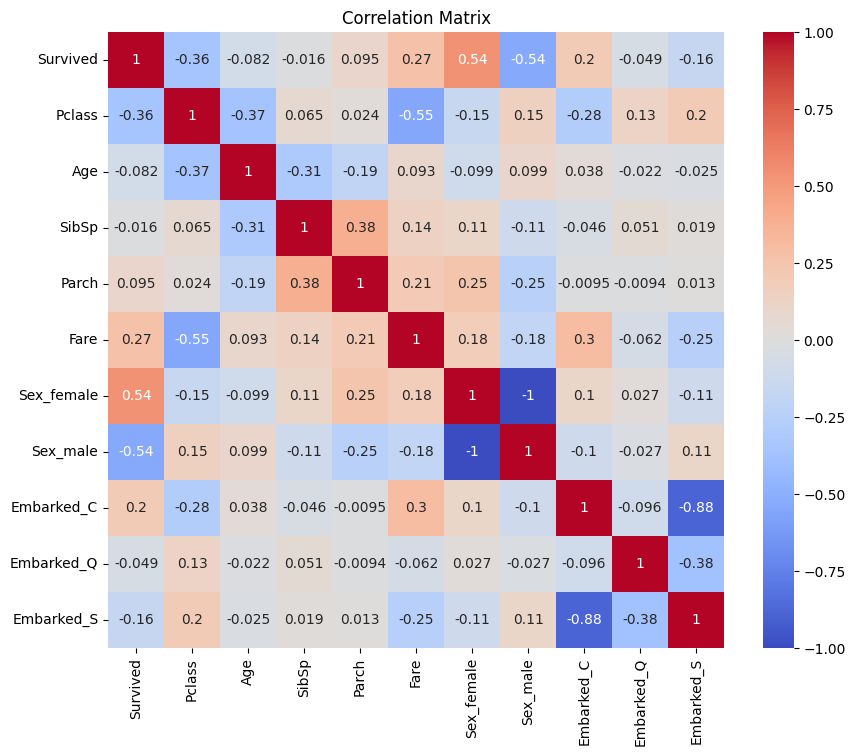

      Feature  Importance
6    Sex_male    0.265090
5  Sex_female    0.192695
4        Fare    0.159963
0      Pclass    0.158033
1         Age    0.145657
2       SibSp    0.033842
3       Parch    0.021746
7  Embarked_C    0.014176
9  Embarked_S    0.006739
8  Embarked_Q    0.002059


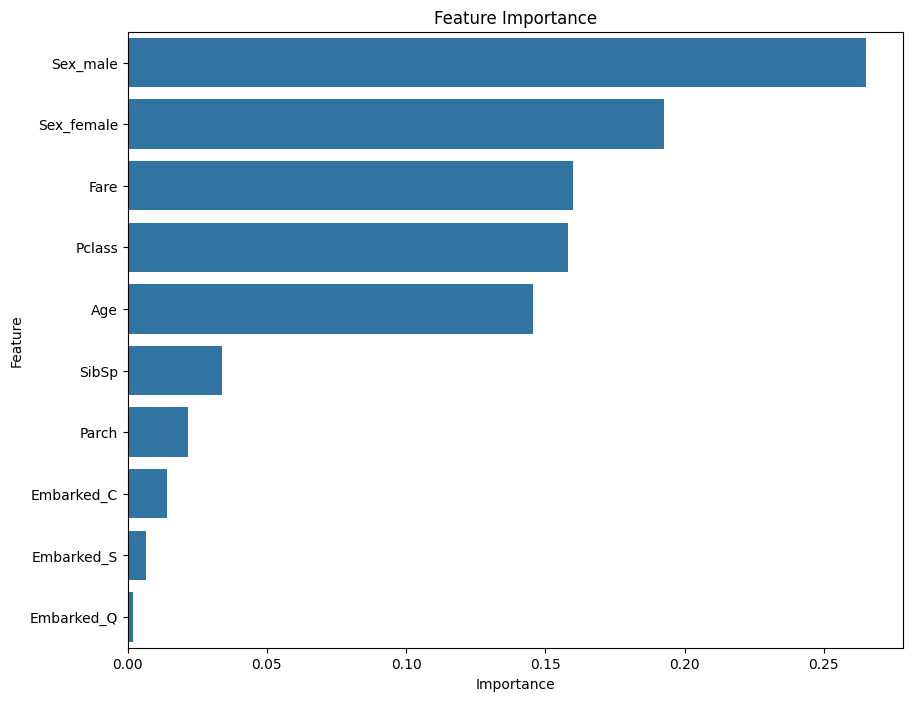

Training Accuracy: 0.88928
Test Accuracy: 0.78322


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
'''
Variable    Definition    Key
survival    Survival     0 = No, 1 = Yes
pclass     Ticket class   1 = 1st, 2 = 2nd, 3 = 3rd
sex       Sex
Age       Age in years
sibsp      # of siblings / spouses aboard the Titanic
parch      # of parents / children aboard the Titanic
ticket     Ticket number
fare      Passenger fare
cabin      Cabin number
embarked    Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
'''

df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df = df.dropna()

# One-Hot Encoding to convert categorical data into numerical data
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'])

# Visualize the correlation matrix by using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Prepare the data for modeling (excluding 'Survived')
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=4, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_clf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Evaluate the model
train_accuracy = rf_clf.score(X_train, y_train)
test_accuracy = rf_clf.score(X_test, y_test)
print(f'Training Accuracy: {train_accuracy:.5f}')
print(f'Test Accuracy: {test_accuracy:.5f}')